In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('./data/train_mobile.csv', sep=';')
data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [13]:
data.price_range

0       0
1       1
2       1
3       1
4       0
5       0
6       1
7       0
8       0
9       0
10      1
11      1
12      0
13      1
14      0
15      0
16      1
17      1
18      0
19      0
20      1
21      1
22      0
23      0
24      0
25      1
26      1
27      1
28      1
29      0
       ..
1970    1
1971    0
1972    0
1973    1
1974    0
1975    1
1976    0
1977    1
1978    0
1979    0
1980    0
1981    0
1982    1
1983    1
1984    0
1985    1
1986    0
1987    0
1988    0
1989    0
1990    0
1991    1
1992    0
1993    1
1994    1
1995    0
1996    1
1997    1
1998    0
1999    1
Name: price_range, Length: 2000, dtype: int64

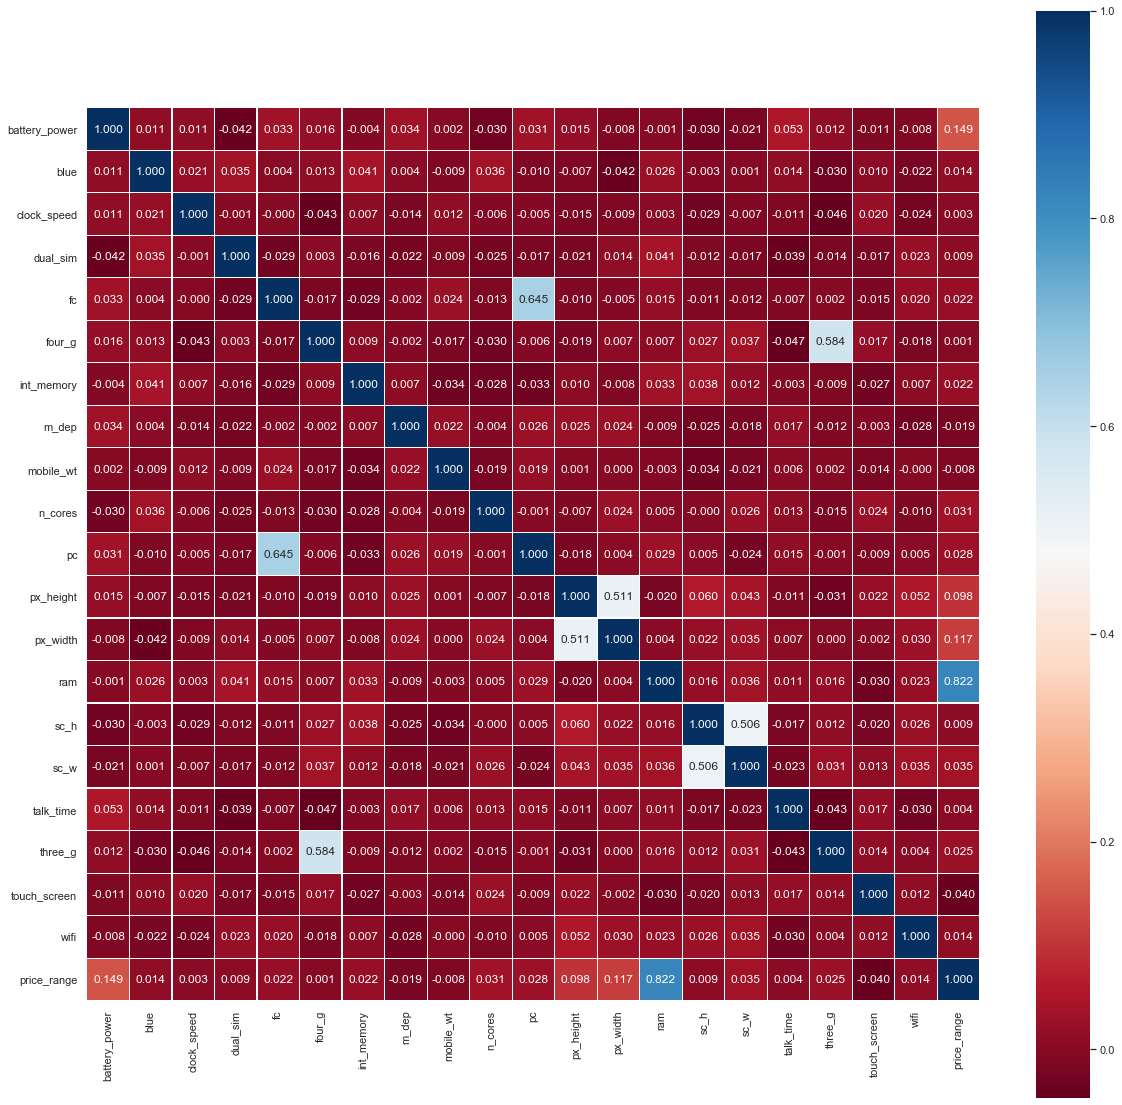

In [18]:
import seaborn as sns
sns.set(font_scale=1)
plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu")

In [24]:
Y = data.price_range
X = data[['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']]

In [33]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=31)
# model = LogisticRegression(solver='liblinear', multi_class='auto')
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_val)
# print(round(accuracy_score(Y_val,Y_predicted), 2))
print(round(precision_score(Y_val,Y_predicted), 4))
# print(recall_score(Y_val,Y_predicted))
# print(f1_score(Y_val,Y_predicted))

0.9859
